In [72]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mapclassify import NaturalBreaks
from psycopg import connect

env_path = ".env"
with open(env_path) as f:
    env = {}
    for line in f.readlines():
        if line.startswith("#"):
            continue
        env_key, _val = line.split("=", 1)
        env_value = _val.split("\n")[0]
        env[env_key] = env_value

connection_str = (
    f'postgresql://{env["API_POSTGRES_USERNAME"]}:{env["API_POSTGRES_PASSWORD"]}@'
    f'{env["API_POSTGRES_HOST"]}:{env["API_POSTGRES_PORT"]}/{env["API_POSTGRES_DATABASE"]}'
)

In [67]:
def get_jenk_breaks(table: str, column: str, agg_func: str):
    if agg_func == "sum":
        agg_line = f'sum("{column}") v'
    elif agg_func == "mean":
        agg_line = f'avg("{column}") v'
    elif agg_func == "mode":
        agg_line = f'mode() within group (order by "{column}") as v'
    else:
        raise ValueError(f"Agg function {agg_func} is not recognized")

    with connect(connection_str) as conn:
        sql = f"""
        select 
            h3_to_parent(t.h3index, 4) h3idx,
            {agg_line}
        from {table} t
        group by h3idx;
        """
        df = pd.read_sql(sql, conn)

    breaks = NaturalBreaks(df["v"].dropna(), k=6)
    fig, ax = plt.subplots()
    ax.hist(df["v"], bins=100, log=True)
    for bin_ in breaks.bins:
        plt.axvline(bin_, c="r")
    print(breaks)
    return ax

## Biodiversity

/home/biel/miniconda3/envs/landgriffon/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


NaturalBreaks           

    Interval       Count
------------------------
[  0.02,   3.98] | 60422
(  3.98,  12.80] | 11666
( 12.80,  31.66] |  2610
( 31.66,  73.36] |   410
( 73.36, 141.71] |    75
(141.71, 310.35] |     9


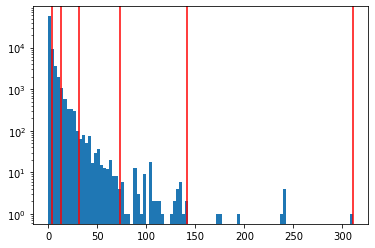

In [68]:
get_jenk_breaks("h3_grid_bio_global", "lciaPslRPermanentCrops", "mean");

## Deforestation

/home/biel/miniconda3/envs/landgriffon/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/biel/miniconda3/envs/landgriffon/lib/python3.10/site-packages/mapclassify/classifiers.py:1718: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/home/biel/miniconda3/envs/landgriffon/lib/python3.10/site-packages/mapclassify/classifiers.py:1719: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % uvk, UserWarning)


NaturalBreaks        

  Interval      Count
---------------------
[0.00, 0.00] | 240157
(0.00, 1.00] |  27084


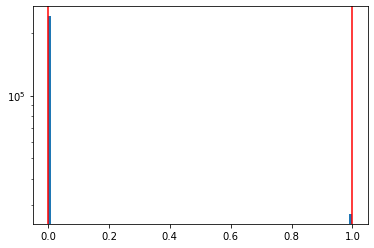

In [63]:
get_jenk_breaks("h3_grid_deforestation_global", "hansenLoss2019", "mode");

## Carbon

/home/biel/miniconda3/envs/landgriffon/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


NaturalBreaks               

      Interval         Count
----------------------------
[    0.00,   159.20] | 46956
(  159.20,   823.71] |  4225
(  823.71,  2454.54] |   448
( 2454.54,  6013.14] |   143
( 6013.14, 12167.56] |    53
(12167.56, 25058.65] |    12


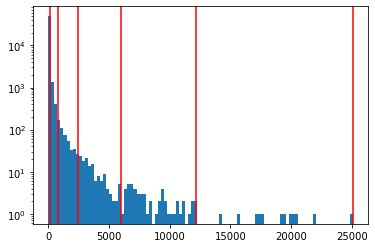

In [65]:
get_jenk_breaks("h3_grid_carbon_global", "earthstat2000GlobalHectareEmissions", "sum");

## Water

/home/biel/miniconda3/envs/landgriffon/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


NaturalBreaks                               

              Interval                 Count
--------------------------------------------
[            1.37,   17492922000.00] | 33465
(  17492922000.00,   78225230000.00] |   159
(  78225230000.00,  196827190000.00] |    33
( 196827190000.00,  430112240000.00] |    17
( 430112240000.00,  719765300000.00] |     6
( 719765300000.00, 1034112600000.00] |     2


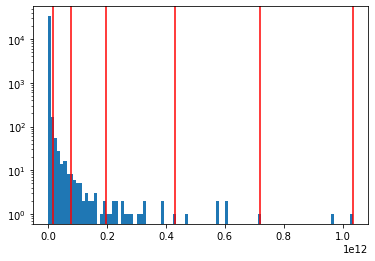

In [71]:
get_jenk_breaks("h3_grid_wf_global", "wfBltotMmyrT", "sum");